In [7]:
# Handwritten Digit Recognition using CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (28,28,1) because CNN expects a 3D input (H, W, Channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels (0–9 → vector of size 10)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 5. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# 6. Save model
model.save("cnn_mnist_model.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.8868 - loss: 0.3672 - val_accuracy: 0.9855 - val_loss: 0.0527
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9838 - loss: 0.0513 - val_accuracy: 0.9870 - val_loss: 0.0429
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.9905 - val_loss: 0.0358
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9888 - val_loss: 0.0368
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 51ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9920 - val_loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9864 - loss: 0.0394


Test Accuracy: 99.03%


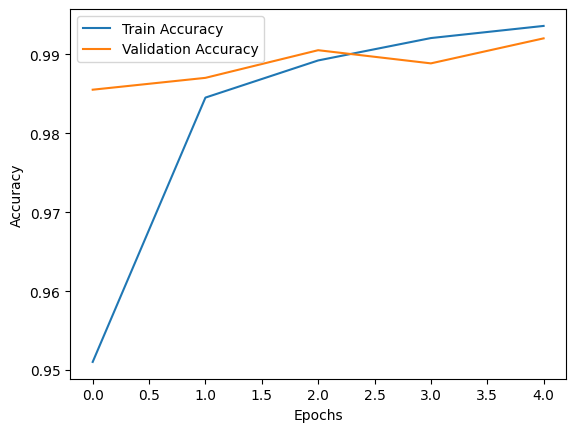

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
image_path="/content/dataset/4.png"
img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
img = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255.0

prediction = model.predict(img)
print("Predicted digit:", np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted digit: 4


In [11]:
image_path="/content/dataset/3.png"
img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
img = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255.0

prediction = model.predict(img)
print("Predicted digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted digit: 3


In [12]:
image_path="/content/dataset/1.png"
img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
img = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255.0

prediction = model.predict(img)
print("Predicted digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted digit: 7


In [14]:
image_path="/content/dataset/7.png"
img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
img = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255.0

prediction = model.predict(img)
print("Predicted digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted digit: 2


In [15]:
image_path="/content/dataset/2.png"
img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
img = np.array(img).reshape(1, 28, 28, 1).astype('float32') / 255.0

prediction = model.predict(img)
print("Predicted digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 2


## The CNN Done above isnt of high accuracy, mismatch in 2,7,1
## Refer to this link https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb